#**Trabalho de Mineração de dados - Predição na Base de Dados SpaceShip Titanic do Kaggle**


**Alunos:** Halliday Gauss e William Gomes



# **O Problema:** Spaceship Titanic

No ano de 2912, foi recebido uma transmissão de quatro anos-luz de distância.

A nave espacial Titanic com quase 13.000 passageiros a bordo, partiu em sua viagem inaugural transportando emigrantes do nosso sistema solar para três exoplanetas recém-habitáveis ​​orbitando estrelas próximas.

Durante o percurso a nave colidiu com uma anomalia do espaço-tempo escondida dentro de uma nuvem de poeira. Embora a nave tenha permanecido intacta, quase metade dos passageiros foi transportada para uma dimensão alternativa!

Para ajudar as equipes de resgate e recuperar os passageiros perdidos, você é desafiado a prever quais passageiros foram transportados pela anomalia usando registros recuperados do sistema de computador danificado da nave espacial.

Link da competição: https://www.kaggle.com/competitions/spaceship-titanic



# **Motivação:** 



Deseja-se ajudar a salvar os seres humanos e mudar a história !

Após uma análise dessa base de dados tirada do Kaggle é possível perceber dados inconsistentes, irrelavantes e nulos. Portanto, é uma boa oportunidade para treinar os conhecimentos de Mineração de Dados e aplicar posteriormente uma posterior Classificação (predição) através de técnicas de DeepLearning.

# Objetivo:


O objetivo do trabalho é realizar a mineração dos dados na base de dados, de maneira que os mesmos se tornem úteis para que a aplicação de um algoritmo de classificação seja eficiente e aceitável.

Através de um conjunto de teste deve-se realizar a predição dos dados, utilizando um Ensemble de TabNet's',visando saber se os passageiros foram parar em outra dimensão ou não.

#Descrição dos Atributos


A primeira etapa do trabalho consiste em analisar os atributos para entender melhor a base de dados e poder tratá-los. Logo abaixo é possível ver toda essa análise:


------------------------------------------------------------------------

**PassengerId** 

 - Um ID exclusivo para cada passageiro. Cada ID assume a forma gggg_pp onde gggg indica um grupo com o qual o passageiro está viajando e pp é seu número dentro do grupo. As pessoas em um grupo geralmente são membros da família, mas nem sempre.

 - Atributo Categórico Ordinal

------------------------------------------------------------------------

**HomePlanet** 
- O planeta de onde o passageiro partiu, normalmente seu planeta de residência permanente.
- Atributo Categórico Nominal

------------------------------------------------------------------------
**CryoSleep** 
- Indica se o passageiro optou por ser colocado em animação suspensa durante a viagem. Os passageiros em sono criogênico estão confinados em suas cabines. 
- Atributo Binário Simétrico

------------------------------------------------------------------------

**Cabin** 
- O número da cabine onde o passageiro está hospedado. Tem o formato deck/num/side, onde side pode ser tanto P para Bombordo como S para Estibordo.
- Atributo Categórico Ordinal

------------------------------------------------------------------------

**Destination** 
- O planeta para o qual o passageiro irá desembarcar.
- Atributo Categórico Nominal
------------------------------------------------------------------------

**Age** 
- A idade do passageiro.
- Atributo Discreto

------------------------------------------------------------------------

**VIP** 
- Se o passageiro pagou pelo serviço VIP especial durante a viagem.
- Atributo Binário Simétrico

------------------------------------------------------------------------

**RoomService** 
- Valor que o passageiro cobrou pelo serviço de quarto.
- Atributo Contínuo

------------------------------------------------------------------------

**FoodCourt** 
- Valor que o passageiro gastou na praça de alimentação.
- Atributo Contínuo

------------------------------------------------------------------------

**ShoppingMall** 
- Valor que o passageiro gastou no shopping.
- Atributo Contínuo

------------------------------------------------------------------------

**Spa** 
- Valor que o passageiro gastou no spa.
- Atributo Contínuo

------------------------------------------------------------------------
**VRDeck** 
- Valor que o passageiro gastou no deck de RV.
- Atributo Contínuo

------------------------------------------------------------------------

**Name** 
- O nome e sobrenome do passageiro.
- Atributo Categórico Nominal
------------------------------------------------------------------------

**Transported** 
- Se o passageiro foi transportado para outra dimensão.
- Atributo Binário Simétrico (O que deve ser predito)
------------------------------------------------------------------------

#Importações

Agora, será feito as importações de algumas funcionalidades que serão utilizadas.

In [19]:
# Bibliotecas processamento
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing

# Ler base de Dados

Lendo as bases de dados de treino e teste

In [20]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [21]:
len(df_train[df_train.Transported == False])/len(df_train.index)

0.4963763948004141

# Observando base de dados

Visualizando base de treino

In [22]:
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


Visualizando base de teste

In [23]:
df_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


São 8693 registros para treino e 4277 para teste.

A base de dados possue no total 14 atributos com o rótulo.

# Realizar algumas transformações

Realizar as seguintes transformações na base de treino e de teste:
  - Separar Passenger ID em dois atributos: grupo e posição no grupo
  - Separar Cabine em 3 atributos. Deck/Num/Side, onde side é P para bombordo e S estibordo.
  - Garantir que quem está hibernando(CryoSleep = True) não gastou nada
  - Garantir que passageiros com menos de 5 anos não gastem nada
  - Criar novo atributo sendo a soma dos gastos
  - Remover atributo Name
  - Realizar One-Hot-Encoding em Posição no grupo, HomePlanet CryoSleep, Cabin_Deck, Cabin_Side, Destination e VIP.

In [24]:
def separarPassengerID(df):
  df = df.copy()
  df["Group"] = df["PassengerId"].map(lambda id : int(id.split("_")[0]))
  df["PositionGroup"] = df["PassengerId"].map(lambda id : int(id.split("_")[1]))
  df.drop(["PassengerId"], axis=1, inplace =True)
  return df

In [25]:
def separarCabine(df):
  df = df.copy()
  df["Cabin_Deck"] = df["Cabin"].map(lambda cabin :  cabin if pd.isna(cabin) else cabin.split("/")[0])
  df["Cabin_Num"] = df["Cabin"].map(lambda cabin : cabin if pd.isna(cabin) else cabin.split("/")[1])
  df["Cabin_Side"] = df["Cabin"].map(lambda cabin : cabin if pd.isna(cabin) else cabin.split("/")[2])

  df.drop(["Cabin"], axis=1, inplace =True)
  return df

In [26]:
def hibernado_nao_gasta(df):
  df = df.copy()
  atributos = ['RoomService',	'FoodCourt',	'ShoppingMall',	'Spa','VRDeck']

  mask = df.CryoSleep == True
  df.loc[mask, atributos] = 0

  return df

In [27]:
def menor_nao_gasta(df):
  df = df.copy()
  atributos = ['RoomService',	'FoodCourt',	'ShoppingMall',	'Spa','VRDeck']

  mask = df.Age <= 5
  df.loc[mask, atributos] = 0

  return df

In [28]:
def gerar_total_gasto(df):
  df = df.copy()
  df["Total_Spent"] = df['RoomService'] + df['FoodCourt'] +  df['ShoppingMall'] + df['Spa'] + df['VRDeck']
  #df["Room_Spa_VRDeck"] = df['RoomService'] + df['Spa'] + df['VRDeck']
  #df["Food_Shopping"] = df['FoodCourt'] +  df['ShoppingMall']
  return df

In [29]:
def removerName(df):
  df = df.copy()
  df.drop(["Name"], axis=1, inplace =True)
  return df

In [30]:
def one_hot_encoder(df):
  df = df.copy()

  atributos = ['HomePlanet', 'CryoSleep', 'Cabin_Deck', 'Cabin_Side', 'Destination', 'VIP']

  # HomePlanet
  df["HomePlanet_Europa"] = df["HomePlanet"].map({'Europa': 1, 'Earth':0, 'Mars':0})
  df["HomePlanet_Earth"] = df["HomePlanet"].map({'Europa': 0, 'Earth':1, 'Mars':0})
  df["HomePlanet_Mars"] = df["HomePlanet"].map({'Europa': 0, 'Earth':0, 'Mars':1})
  df.drop(["HomePlanet"], axis=1, inplace=True)

  #CryoSleep
  #df["CryoSleep"] = df["CryoSleep"].map({False: 0, True: 1})
  df["CryoSleep_False"] = df["CryoSleep"].map({False: 1, True: 0})
  df["CryoSleep_True"] = df["CryoSleep"].map({False: 0, True:1})
  df.drop(["CryoSleep"], axis=1, inplace=True)

  #Cabin_Deck
  df["Cabin_Deck_A"] = df["Cabin_Deck"].map({'A':1, 'B':0, 'C':0, 'D':0, 'E':0, 'F':0, 'G':0, 'T':0})
  df["Cabin_Deck_B"] = df["Cabin_Deck"].map({'A':0, 'B':1, 'C':0, 'D':0, 'E':0, 'F':0, 'G':0, 'T':0})
  df["Cabin_Deck_C"] = df["Cabin_Deck"].map({'A':0, 'B':0, 'C':1, 'D':0, 'E':0, 'F':0, 'G':0, 'T':0})
  df["Cabin_Deck_D"] = df["Cabin_Deck"].map({'A':0, 'B':0, 'C':0, 'D':1, 'E':0, 'F':0, 'G':0, 'T':0})
  df["Cabin_Deck_E"] = df["Cabin_Deck"].map({'A':0, 'B':0, 'C':0, 'D':0, 'E':1, 'F':0, 'G':0, 'T':0})
  df["Cabin_Deck_F"] = df["Cabin_Deck"].map({'A':0, 'B':0, 'C':0, 'D':0, 'E':0, 'F':1, 'G':0, 'T':0})
  df["Cabin_Deck_G"] = df["Cabin_Deck"].map({'A':0, 'B':0, 'C':0, 'D':0, 'E':0, 'F':0, 'G':1, 'T':0})
  df["Cabin_Deck_T"] = df["Cabin_Deck"].map({'A':0, 'B':0, 'C':0, 'D':0, 'E':0, 'F':0, 'G':0, 'T':1})
  df.drop(["Cabin_Deck"], axis=1, inplace=True)

  # Cabin_Side
  #df["Cabin_Side"] = df["Cabin_Side"].map({'P':1, 'S':0})
  df["Cabin_Side_P"] = df["Cabin_Side"].map({'P':1, 'S':0})
  df["Cabin_Side_S"] = df["Cabin_Side"].map({'P':0, 'S':1})
  df.drop(["Cabin_Side"], axis=1, inplace=True)

  # Destination
  df["Destination_TRAPPIST-1e"] = df["Destination"].map({'TRAPPIST-1e': 1, 'PSO J318.5-22':0, '55 Cancri e':0})
  df["Destination_PSO J318.5-22"] = df["Destination"].map({'TRAPPIST-1e': 0, 'PSO J318.5-22':1, '55 Cancri e':0})
  df["Destination_55 Cancri e"] = df["Destination"].map({'TRAPPIST-1e': 0, 'PSO J318.5-22':0, '55 Cancri e':1})
  df.drop(["Destination"], axis=1, inplace=True)

  #VIP
  #df["VIP"] = df["VIP"].map({False: 0, True: 1})
  df["VIP_False"] = df["VIP"].map({False: 1, True: 0})
  df["VIP_True"] = df["VIP"].map({False: 0, True:1})
  df.drop(["VIP"], axis=1, inplace=True)

  return df

def gerar_hot_encoders(df):
  
  atributos = ["Group", "PositionGroup"]

  hot_encoders = dict()
  
  for atributo in atributos:
    hot_encoder = preprocessing.OneHotEncoder()
    hot_encoder.fit(df[atributo].values.reshape(-1,1))
    hot_encoders[atributo] = hot_encoder

  return hot_encoders
  
# Transformar em numérico
def tranformar_onehot(df, hot_encoders):
  df = df.copy()
  atributos = ["PositionGroup"]
  for atributo in atributos:
    X = hot_encoders[atributo].transform(df[atributo].values.reshape(-1,1)).toarray()
    columns = [atributo +"_"+ str(valor) for valor in df[atributo].unique()]
    dfOneHot = pd.DataFrame(X, columns= columns)
    df = pd.concat([df, dfOneHot], axis=1)
    df.drop([atributo], axis=1, inplace=True)
  return df

def label_encoder_rotulo(df):
  df = df.copy()
  df['Transported'] = df['Transported'].map({True: 1, False: 0})
  return df

In [31]:
def transformacoes(df, treino = True):
  df = df.copy()
  df = separarPassengerID(df)
  df = separarCabine(df)
  df = hibernado_nao_gasta(df)
  df = menor_nao_gasta(df)
  df = gerar_total_gasto(df)
  df = removerName(df)
  df = one_hot_encoder(df)

  
  if treino:
    df = label_encoder_rotulo(df)

  return df


Logo abaixo, é possível observar que diminuiu os valores nulos com as transformações

In [32]:
t = transformacoes(df_train, treino=True)
t.isnull().sum()

Age                          179
RoomService                  109
FoodCourt                    107
ShoppingMall                 108
Spa                          115
VRDeck                       118
Transported                    0
Group                          0
PositionGroup                  0
Cabin_Num                    199
Total_Spent                  537
HomePlanet_Europa            201
HomePlanet_Earth             201
HomePlanet_Mars              201
CryoSleep_False              217
CryoSleep_True               217
Cabin_Deck_A                 199
Cabin_Deck_B                 199
Cabin_Deck_C                 199
Cabin_Deck_D                 199
Cabin_Deck_E                 199
Cabin_Deck_F                 199
Cabin_Deck_G                 199
Cabin_Deck_T                 199
Cabin_Side_P                 199
Cabin_Side_S                 199
Destination_TRAPPIST-1e      182
Destination_PSO J318.5-22    182
Destination_55 Cancri e      182
VIP_False                    203
VIP_True  

In [33]:
df_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [34]:
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


Transformar dados de treino

In [35]:
t = transformacoes(df_train, treino=True)
hot_encoders = gerar_hot_encoders(t)
t = tranformar_onehot(t, hot_encoders)
df_train = t

Transformar dados de teste

In [36]:
t = transformacoes(df_test, treino=False)
hot_encoders = gerar_hot_encoders(t)
t = tranformar_onehot(t, hot_encoders)
df_test = t

In [37]:
df_train

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Group,Cabin_Num,Total_Spent,...,VIP_False,VIP_True,PositionGroup_1,PositionGroup_2,PositionGroup_3,PositionGroup_4,PositionGroup_5,PositionGroup_6,PositionGroup_7,PositionGroup_8
0,39.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0,1,2,0,736.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,3,0,10383.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0,3,0,5176.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,16.0,303.0,70.0,151.0,565.0,2.0,1,4,1,1091.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,0,9276,98,8536.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8689,18.0,0.0,0.0,0.0,0.0,0.0,0,9278,1499,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8690,26.0,0.0,0.0,1872.0,1.0,0.0,1,9279,1500,1873.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,0,9280,608,4637.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Investigar valores ausentes

In [170]:
pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [171]:
import missingno as msno

Investigar valores ausentes nos dados de treino

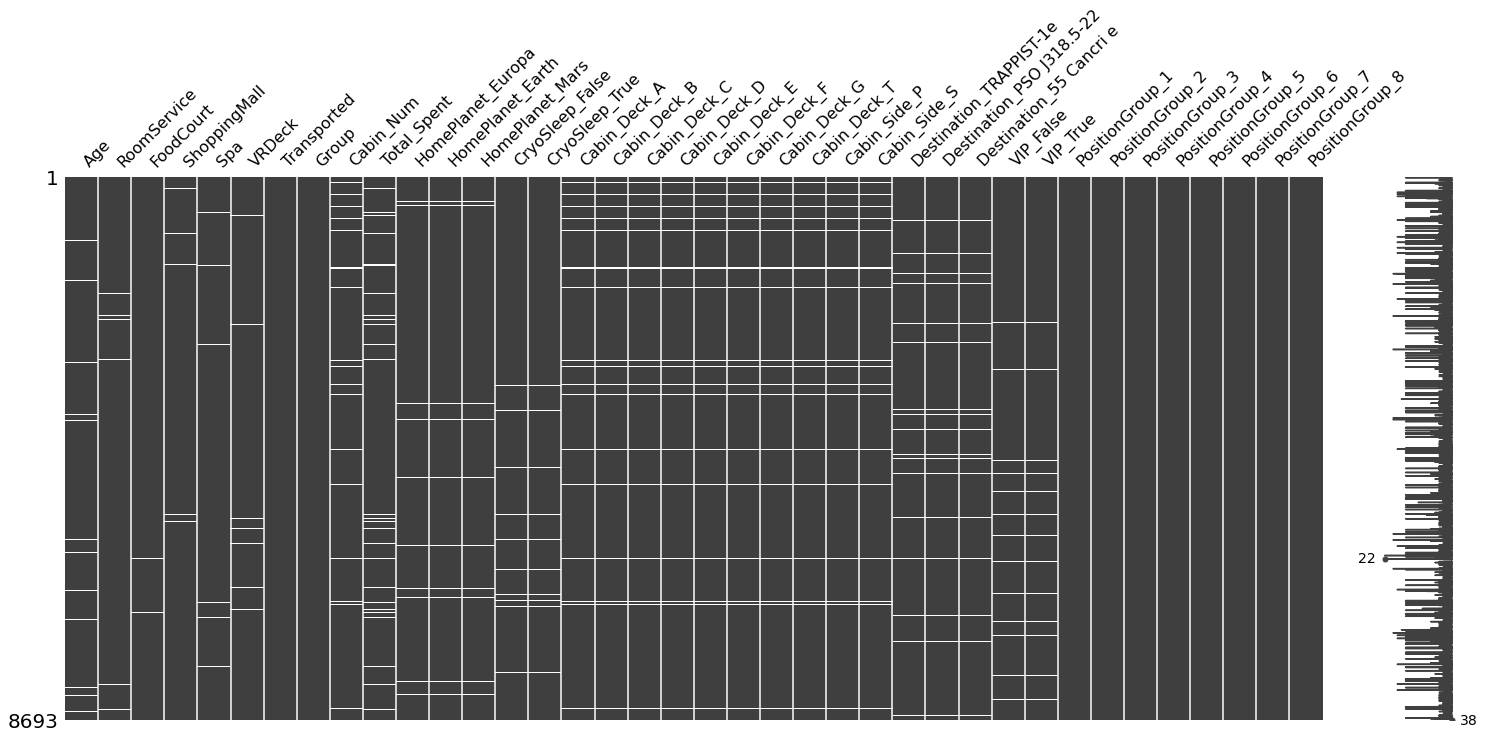

In [172]:
msno.matrix(df_train)

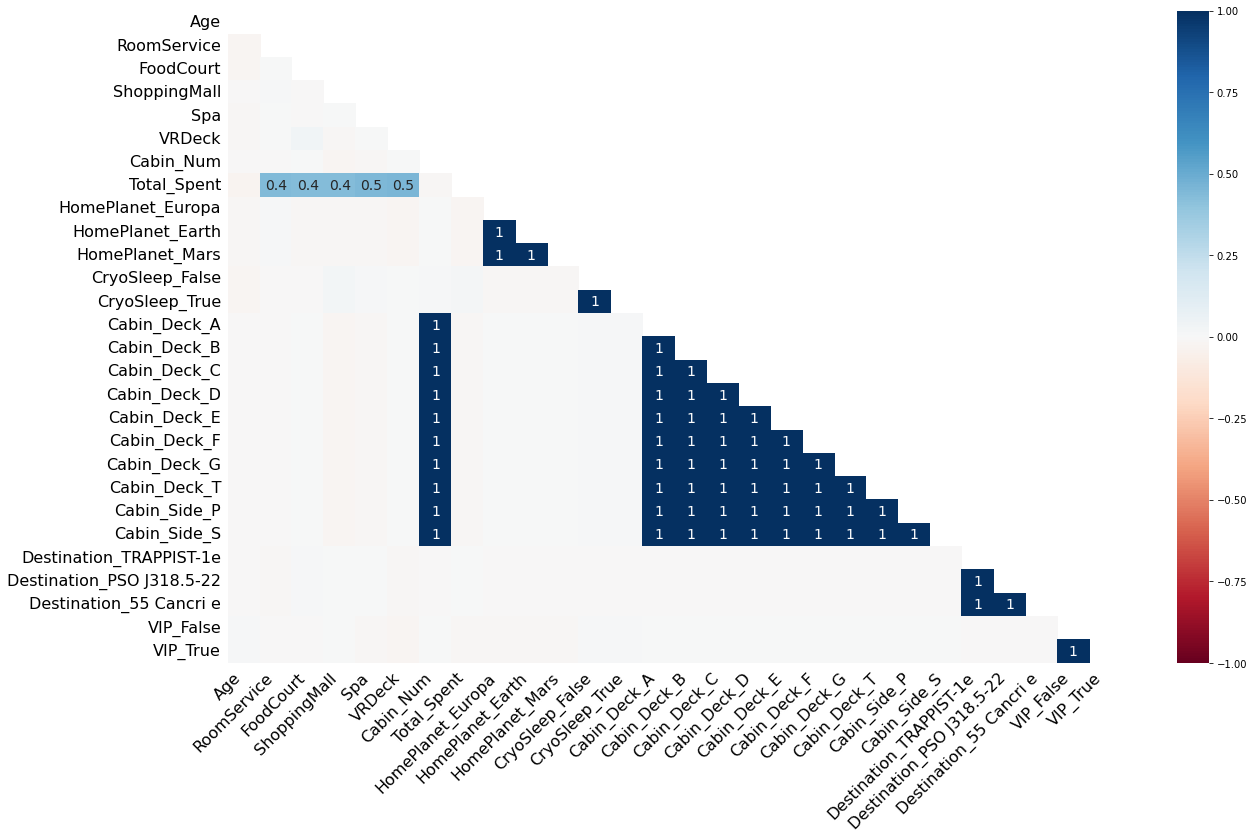

In [173]:
msno.heatmap(df_train)

Investigar valores ausentes nos dados de teste

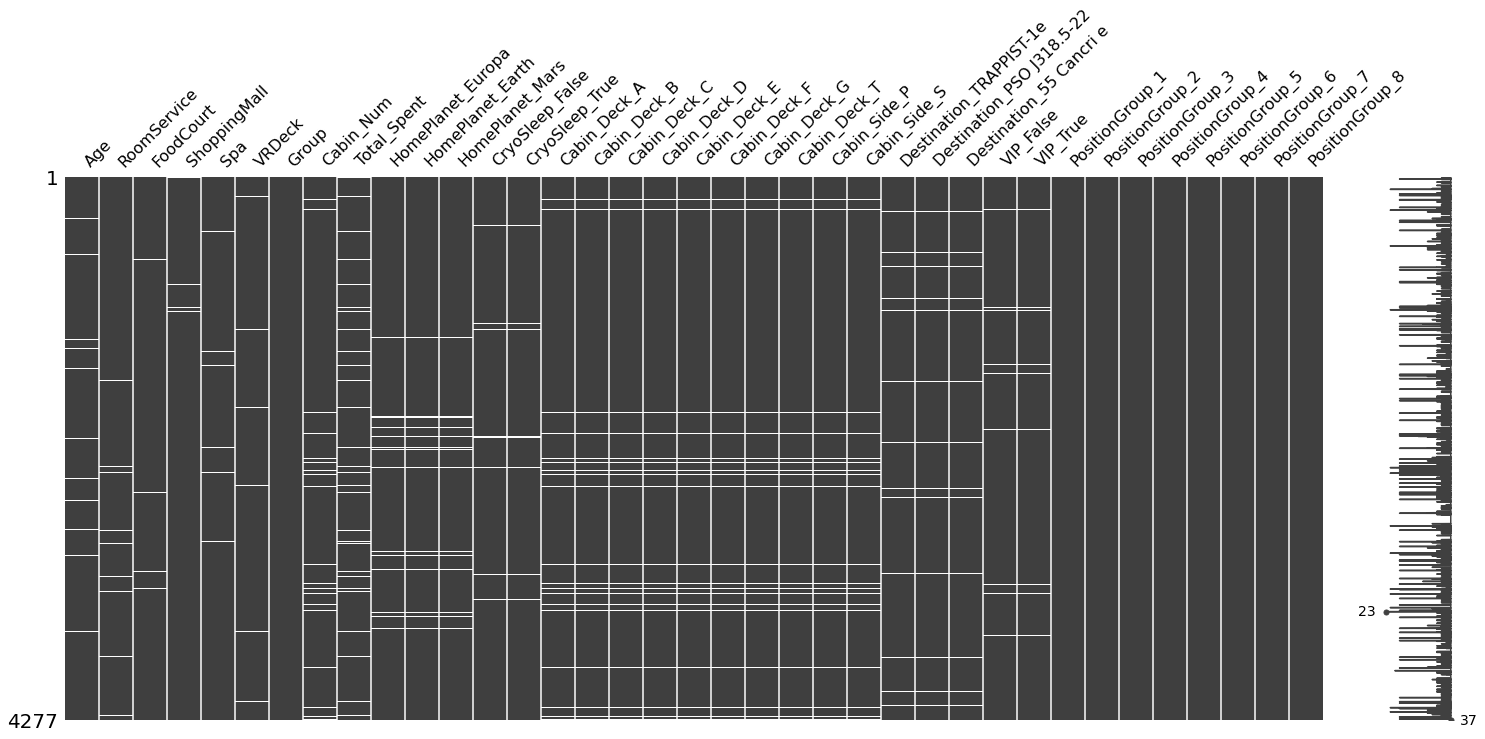

In [174]:
msno.matrix(df_test)

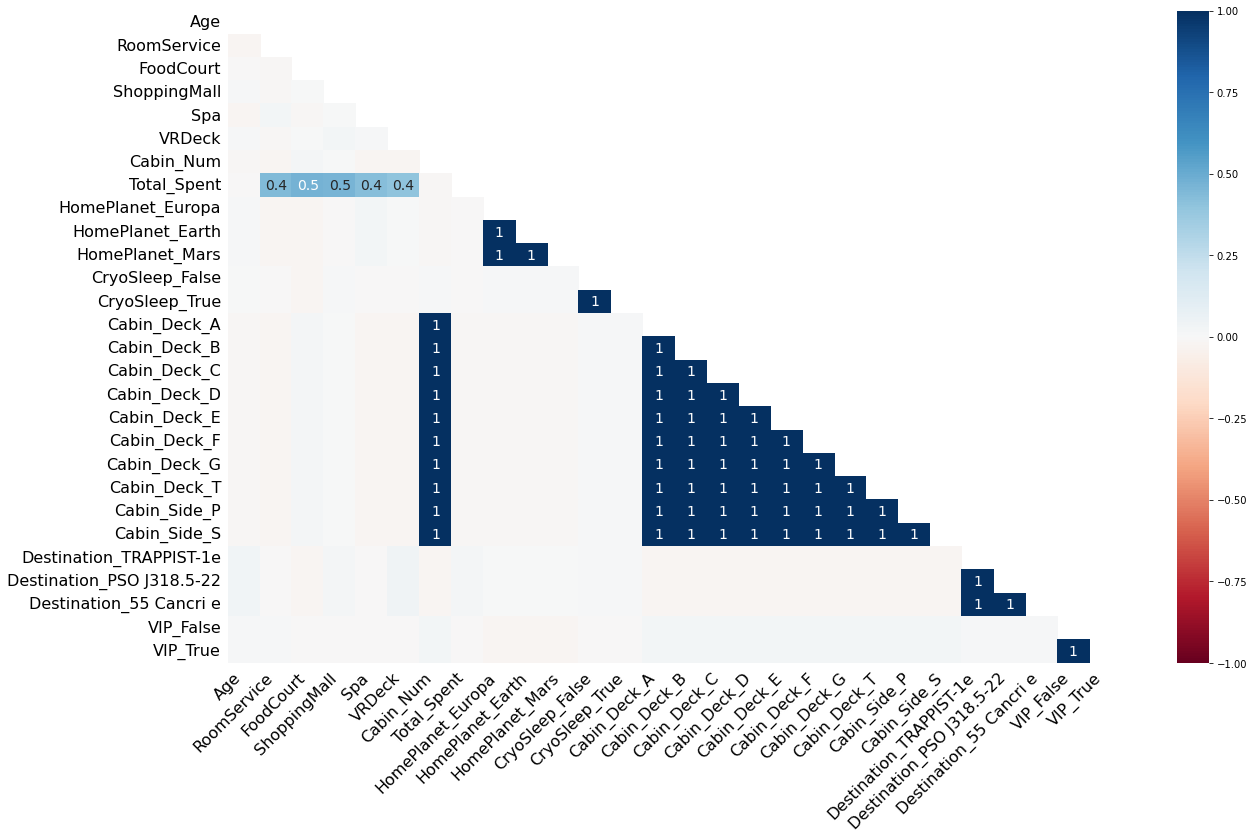

In [175]:
msno.heatmap(df_test)

A correlação entre os atributos em relação aos valores nulos é bem semelhante entre as bases de treino e de teste.

Agora que foi analisado os atributos nulos, eles deverão ser preenchidos para melhor desempenho dos nossos modelos. Isso será feito utilizando o KNN Imputer.

Preenchendo os valores nulos dos dados de treino

In [176]:
from sklearn.impute import KNNImputer

In [177]:
rotulo = df_train["Transported"]
df_train.drop(["Transported"], axis=1, inplace=True)
imputer = KNNImputer(missing_values=np.nan)
imputer.fit(df_train)
df_train = pd.DataFrame(imputer.transform(df_train), columns=df_train.columns)
df_train["Transported"] = rotulo
df_train.isnull().sum()

Age                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Group                        0
Cabin_Num                    0
Total_Spent                  0
HomePlanet_Europa            0
HomePlanet_Earth             0
HomePlanet_Mars              0
CryoSleep_False              0
CryoSleep_True               0
Cabin_Deck_A                 0
Cabin_Deck_B                 0
Cabin_Deck_C                 0
Cabin_Deck_D                 0
Cabin_Deck_E                 0
Cabin_Deck_F                 0
Cabin_Deck_G                 0
Cabin_Deck_T                 0
Cabin_Side_P                 0
Cabin_Side_S                 0
Destination_TRAPPIST-1e      0
Destination_PSO J318.5-22    0
Destination_55 Cancri e      0
VIP_False                    0
VIP_True                     0
PositionGroup_1              0
PositionGroup_2              0
PositionGroup_3              0
Position

Preenchendo os valores nulos dos dados de teste

In [178]:
df_test = pd.DataFrame(imputer.transform(df_test), columns=df_test.columns)
df_test.isnull().sum()

Age                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Group                        0
Cabin_Num                    0
Total_Spent                  0
HomePlanet_Europa            0
HomePlanet_Earth             0
HomePlanet_Mars              0
CryoSleep_False              0
CryoSleep_True               0
Cabin_Deck_A                 0
Cabin_Deck_B                 0
Cabin_Deck_C                 0
Cabin_Deck_D                 0
Cabin_Deck_E                 0
Cabin_Deck_F                 0
Cabin_Deck_G                 0
Cabin_Deck_T                 0
Cabin_Side_P                 0
Cabin_Side_S                 0
Destination_TRAPPIST-1e      0
Destination_PSO J318.5-22    0
Destination_55 Cancri e      0
VIP_False                    0
VIP_True                     0
PositionGroup_1              0
PositionGroup_2              0
PositionGroup_3              0
Position

# Normalização - MétodoMinMax

O próximo passo é normalizar a base de dados usando o Método Min Max, no intuito de melhorar o desempenho dos modelos classificadores.

Normalizar base de treino

In [179]:
rotulo = df_train["Transported"]
df_train.drop(["Transported"], axis=1, inplace=True)

scaler = preprocessing.MinMaxScaler()
scaler = scaler.fit(df_train)
df_train = pd.DataFrame(scaler.transform(df_train),  columns=df_train.columns) 
df_train

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,Cabin_Num,Total_Spent,HomePlanet_Europa,...,VIP_False,VIP_True,PositionGroup_1,PositionGroup_2,PositionGroup_3,PositionGroup_4,PositionGroup_5,PositionGroup_6,PositionGroup_7,PositionGroup_8
0,0.493671,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.303797,0.007608,0.000302,0.001064,0.024500,0.001823,0.000108,0.000000,0.020452,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.734177,0.003001,0.119948,0.000000,0.299670,0.002030,0.000216,0.000000,0.288521,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.417722,0.000000,0.043035,0.015793,0.148563,0.007997,0.000216,0.000000,0.143830,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.202532,0.021149,0.002348,0.006428,0.025214,0.000083,0.000323,0.000528,0.030317,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.518987,0.000000,0.228726,0.000000,0.073322,0.003066,0.999569,0.051742,0.237197,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8689,0.227848,0.000000,0.000000,0.000000,0.000000,0.000000,0.999784,0.791447,0.000000,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8690,0.329114,0.000000,0.000000,0.079687,0.000045,0.000000,0.999892,0.791975,0.052047,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8691,0.405063,0.000000,0.035186,0.000000,0.015753,0.134049,1.000000,0.321014,0.128852,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Normalizar base de teste

In [180]:
df_test = pd.DataFrame(scaler.transform(df_test),  columns=df_test.columns) 
df_test

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,Cabin_Num,Total_Spent,HomePlanet_Europa,...,VIP_False,VIP_True,PositionGroup_1,PositionGroup_2,PositionGroup_3,PositionGroup_4,PositionGroup_5,PositionGroup_6,PositionGroup_7,PositionGroup_8
0,0.341772,0.000000,0.000000,0.000000,0.000000,0.000000,0.001293,0.001584,0.000000,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.240506,0.000000,0.000302,0.000000,0.125982,0.000000,0.001832,0.002112,0.078695,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.392405,0.000000,0.000000,0.000000,0.000000,0.000000,0.001940,0.000000,0.000000,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.481013,0.000000,0.223124,0.000000,0.008077,0.024241,0.002155,0.000528,0.206130,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.253165,0.000698,0.000000,0.027030,0.000000,0.000000,0.002371,0.002640,0.017923,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0.430380,0.000000,0.000000,0.000000,0.000000,0.000000,0.998491,0.789863,0.000000,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4273,0.531646,0.000000,0.028410,0.000724,0.000446,0.005967,0.998815,0.948997,0.028288,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4274,0.422785,0.000000,0.000000,0.000000,0.000000,0.000000,0.999030,0.156283,0.000000,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4275,0.351899,0.000000,0.089894,0.000000,0.000000,0.021672,0.999246,0.156811,0.089004,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Separar dados de teste

Importação para separar os dados em treino, validação e teste

In [181]:
from sklearn.model_selection import train_test_split

In [250]:
# Dados de Teste
test_x = df_test.values[:, :]

print(test_x.shape)

(4277, 37)


# Importações para TabNet

Importações

In [183]:
pip install pytorch_tabnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [184]:
import pytorch_tabnet
from pytorch_tabnet.tab_model import TabNetClassifier
import torch
from pytorch_tabnet.pretraining import TabNetPretrainer

# Modelo Pré Treinado

Foram gerado 5 modelos fazendo amostragens na base de treino e treinados utilizando uma TabNet, cada modelo com parâmetros variados. Inicialmente os dados são treinados utilizando a TabNet como modelo não supervisionado, para aprender mais sobre os dados e em seguida realizar a etapa de treinamento para classificação com mais eficiência.



Gerando Modelo 1

In [185]:
# Separando dados de treino e validação
train_x = df_train.values[:,:]
train_y = np.asarray(rotulo)
# 70% para treino e 30% para validação
train_x , validation_x, train_y, validation_y = train_test_split(train_x,train_y,test_size= 0.3) 


# Criando a TabNet Pre_Treinada para Aprendizado Não Supervisionado e ajustando os parâmetros
unsupervised_model_no_preproc = TabNetPretrainer(
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    mask_type='entmax',
    )

# Treinando a TabNet não supervisionada
unsupervised_model_no_preproc.fit(
    train_x,
    eval_set=[validation_x],
    max_epochs=1000 , patience=100,
    batch_size=256, virtual_batch_size=128,
    num_workers=0,
    drop_last=False,
    pretraining_ratio=0.8,
)

# Tentando reconstruir a base
reconstructed_X, embedded_X = unsupervised_model_no_preproc.predict(validation_x)
assert(reconstructed_X.shape==embedded_X.shape)

unsupervised_model_no_preproc.save_model('./test_pretrain2')
loaded_pretrain = TabNetPretrainer()
loaded_pretrain.load_model('./test_pretrain2.zip')


# Criando o modelo classificador TabNet para tarefa Supervisionada e ajustando os parâmetros
modelo_1 = TabNetClassifier(optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=2e-2),
                       scheduler_params={"step_size":10, 
                                         "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='entmax'
                      )
# Treinando a TabNet utilizando os pesos na etapa de Aprendizado Não Supervisionado
modelo_1.fit(
    train_x, train_y,
    eval_set=[(train_x, train_y), (validation_x, validation_y)],
    eval_name=['train', 'valid'],
    eval_metric=['auc', 'accuracy'],
    max_epochs=1000 ,patience=100,
    batch_size=256, virtual_batch_size=128,
    num_workers=0,
    weights=1,
    drop_last=False,
    from_unsupervised=loaded_pretrain 
)


/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 172.85829| val_0_unsup_loss_numpy: 3.6745400428771973|  0:00:00s
epoch 1  | loss: 8.28078 | val_0_unsup_loss_numpy: 2.0853700637817383|  0:00:02s
epoch 2  | loss: 1.45149 | val_0_unsup_loss_numpy: 1.1261199712753296|  0:00:03s
epoch 3  | loss: 1.06101 | val_0_unsup_loss_numpy: 1.0362199544906616|  0:00:03s
epoch 4  | loss: 0.98476 | val_0_unsup_loss_numpy: 1.0529199838638306|  0:00:04s
epoch 5  | loss: 0.95855 | val_0_unsup_loss_numpy: 1.0255299806594849|  0:00:05s
epoch 6  | loss: 0.95382 | val_0_unsup_loss_numpy: 1.0287599563598633|  0:00:06s
epoch 7  | loss: 0.95492 | val_0_unsup_loss_numpy: 1.0162299871444702|  0:00:07s
epoch 8  | loss: 0.94816 | val_0_unsup_loss_numpy: 0.9968199729919434|  0:00:08s
epoch 9  | loss: 0.92946 | val_0_unsup_loss_numpy: 0.9685699939727783|  0:00:10s
epoch 10 | loss: 0.91496 | val_0_unsup_loss_numpy: 0.9575899839401245|  0:00:12s
epoch 11 | loss: 0.92148 | val_0_unsup_loss_numpy: 0.9427700042724609|  0:00:13s
epoch 12 | loss: 0.90662 | 

/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/abstract_model.py:231: UserWarning: Loading weights from unsupervised pretraining
  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 1.26844 | train_auc: 0.79452 | train_accuracy: 0.73985 | valid_auc: 0.79424 | valid_accuracy: 0.7339  |  0:00:00s
epoch 1  | loss: 0.52927 | train_auc: 0.84287 | train_accuracy: 0.73936 | valid_auc: 0.83466 | valid_accuracy: 0.7362  |  0:00:01s
epoch 2  | loss: 0.46954 | train_auc: 0.8435  | train_accuracy: 0.76122 | valid_auc: 0.83287 | valid_accuracy: 0.74578 |  0:00:02s
epoch 3  | loss: 0.44835 | train_auc: 0.85407 | train_accuracy: 0.73607 | valid_auc: 0.84311 | valid_accuracy: 0.72891 |  0:00:03s
epoch 4  | loss: 0.43616 | train_auc: 0.87175 | train_accuracy: 0.73394 | valid_auc: 0.85982 | valid_accuracy: 0.72814 |  0:00:04s
epoch 5  | loss: 0.4419  | train_auc: 0.87282 | train_accuracy: 0.7244  | valid_auc: 0.86319 | valid_accuracy: 0.72661 |  0:00:05s
epoch 6  | loss: 0.41202 | train_auc: 0.87814 | train_accuracy: 0.7364  | valid_auc: 0.8714  | valid_accuracy: 0.73543 |  0:00:05s
epoch 7  | loss: 0.43361 | train_auc: 0.88506 | train_accuracy: 0.79359 | valid_auc

/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Modelo 2

In [194]:
train_x = df_train.values[:,:]
train_y = np.asarray(rotulo)
train_x , validation_x, train_y, validation_y = train_test_split(train_x,train_y,test_size= 0.3) 


unsupervised_model_no_preproc = TabNetPretrainer(
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=0.01),
    mask_type='entmax', 
    )


unsupervised_model_no_preproc.fit(
    train_x,
    eval_set=[validation_x],
    max_epochs=1000 , patience=100,
    batch_size=256, virtual_batch_size=128,
    num_workers=0,
    drop_last=False,
    pretraining_ratio=0.8,
)

reconstructed_X, embedded_X = unsupervised_model_no_preproc.predict(validation_x)
assert(reconstructed_X.shape==embedded_X.shape)

unsupervised_model_no_preproc.save_model('./test_pretrain2')
loaded_pretrain = TabNetPretrainer()
loaded_pretrain.load_model('./test_pretrain2.zip')



modelo_2 = TabNetClassifier(optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=0.01),
                       scheduler_params={"step_size":10, 
                                         "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='entmax'
                      )

modelo_2.fit(
    train_x, train_y,
    eval_set=[(train_x, train_y), (validation_x, validation_y)],
    eval_name=['train', 'valid'],
    eval_metric=['auc', 'accuracy'],
    max_epochs=1000 , patience=100,
    batch_size=256, virtual_batch_size=128,
    num_workers=0,
    weights=1,
    drop_last=False,
    from_unsupervised=loaded_pretrain
    
)

/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 243.49682| val_0_unsup_loss_numpy: 4.962470054626465|  0:00:00s
epoch 1  | loss: 42.77472| val_0_unsup_loss_numpy: 3.379930019378662|  0:00:01s
epoch 2  | loss: 7.95745 | val_0_unsup_loss_numpy: 2.365959882736206|  0:00:02s
epoch 3  | loss: 2.46941 | val_0_unsup_loss_numpy: 1.1230100393295288|  0:00:03s
epoch 4  | loss: 1.41275 | val_0_unsup_loss_numpy: 1.0787999629974365|  0:00:04s
epoch 5  | loss: 1.13315 | val_0_unsup_loss_numpy: 1.0068399906158447|  0:00:04s
epoch 6  | loss: 1.06164 | val_0_unsup_loss_numpy: 1.0223100185394287|  0:00:05s
epoch 7  | loss: 1.03874 | val_0_unsup_loss_numpy: 1.0133399963378906|  0:00:06s
epoch 8  | loss: 0.99346 | val_0_unsup_loss_numpy: 0.9963300228118896|  0:00:07s
epoch 9  | loss: 0.97833 | val_0_unsup_loss_numpy: 1.0028200149536133|  0:00:08s
epoch 10 | loss: 0.985   | val_0_unsup_loss_numpy: 0.9847800135612488|  0:00:08s
epoch 11 | loss: 0.96057 | val_0_unsup_loss_numpy: 0.9964799880981445|  0:00:09s
epoch 12 | loss: 0.95916 | val

/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/abstract_model.py:231: UserWarning: Loading weights from unsupervised pretraining
  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.7702  | train_auc: 0.71536 | train_accuracy: 0.66179 | valid_auc: 0.70575 | valid_accuracy: 0.64379 |  0:00:00s
epoch 1  | loss: 0.53465 | train_auc: 0.7847  | train_accuracy: 0.75974 | valid_auc: 0.7788  | valid_accuracy: 0.75383 |  0:00:01s
epoch 2  | loss: 0.47998 | train_auc: 0.81509 | train_accuracy: 0.76828 | valid_auc: 0.80828 | valid_accuracy: 0.7638  |  0:00:02s
epoch 3  | loss: 0.44605 | train_auc: 0.82821 | train_accuracy: 0.78472 | valid_auc: 0.82393 | valid_accuracy: 0.77262 |  0:00:03s
epoch 4  | loss: 0.44026 | train_auc: 0.84853 | train_accuracy: 0.79556 | valid_auc: 0.83738 | valid_accuracy: 0.78413 |  0:00:04s
epoch 5  | loss: 0.41738 | train_auc: 0.8524  | train_accuracy: 0.80296 | valid_auc: 0.84299 | valid_accuracy: 0.79831 |  0:00:05s
epoch 6  | loss: 0.42433 | train_auc: 0.85894 | train_accuracy: 0.80838 | valid_auc: 0.85096 | valid_accuracy: 0.79908 |  0:00:06s
epoch 7  | loss: 0.40825 | train_auc: 0.88718 | train_accuracy: 0.80082 | valid_auc

/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Modelo 3

In [187]:
train_x = df_train.values[:,:]
train_y = np.asarray(rotulo)
train_x , validation_x, train_y, validation_y = train_test_split(train_x,train_y,test_size= 0.2)


unsupervised_model_no_preproc = TabNetPretrainer(
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=0.02),
    mask_type='entmax',
    )

unsupervised_model_no_preproc.fit(
    train_x,
    eval_set=[validation_x],
    max_epochs=1000 , patience=100,
    batch_size=256, virtual_batch_size=128,
    num_workers=0,
    drop_last=False,
    pretraining_ratio=0.8,
)

reconstructed_X, embedded_X = unsupervised_model_no_preproc.predict(validation_x)
assert(reconstructed_X.shape==embedded_X.shape)

unsupervised_model_no_preproc.save_model('./test_pretrain2')
loaded_pretrain = TabNetPretrainer()
loaded_pretrain.load_model('./test_pretrain2.zip')



modelo_3 = TabNetClassifier(optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=2e-2),
                       scheduler_params={"step_size":10,
                                         "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='entmax'
                      )

modelo_3.fit(
    train_x, train_y,
    eval_set=[(train_x, train_y), (validation_x, validation_y)],
    eval_name=['train', 'valid'],
    eval_metric=['auc', 'accuracy'],
    max_epochs=1000 , patience=100,
    batch_size=256, virtual_batch_size=128,
    num_workers=0,
    weights=1,
    drop_last=False,
    from_unsupervised=loaded_pretrain
    
)

/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 183.01023| val_0_unsup_loss_numpy: 6.272019863128662|  0:00:00s
epoch 1  | loss: 6.18113 | val_0_unsup_loss_numpy: 1.1712900400161743|  0:00:01s
epoch 2  | loss: 1.19282 | val_0_unsup_loss_numpy: 1.0840100049972534|  0:00:02s
epoch 3  | loss: 1.00144 | val_0_unsup_loss_numpy: 1.0104299783706665|  0:00:03s
epoch 4  | loss: 0.95    | val_0_unsup_loss_numpy: 1.0947400331497192|  0:00:04s
epoch 5  | loss: 0.93894 | val_0_unsup_loss_numpy: 1.1284500360488892|  0:00:05s
epoch 6  | loss: 0.94242 | val_0_unsup_loss_numpy: 1.0206300020217896|  0:00:06s
epoch 7  | loss: 0.94374 | val_0_unsup_loss_numpy: 1.057979941368103|  0:00:07s
epoch 8  | loss: 0.91776 | val_0_unsup_loss_numpy: 1.0174700021743774|  0:00:07s
epoch 9  | loss: 0.92873 | val_0_unsup_loss_numpy: 0.9440000057220459|  0:00:08s
epoch 10 | loss: 0.92024 | val_0_unsup_loss_numpy: 0.9256299734115601|  0:00:09s
epoch 11 | loss: 0.90751 | val_0_unsup_loss_numpy: 0.9305099844932556|  0:00:10s
epoch 12 | loss: 0.90714 | va

/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/abstract_model.py:231: UserWarning: Loading weights from unsupervised pretraining
  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.63384 | train_auc: 0.85773 | train_accuracy: 0.75582 | valid_auc: 0.85379 | valid_accuracy: 0.75906 |  0:00:00s
epoch 1  | loss: 0.45139 | train_auc: 0.87112 | train_accuracy: 0.77668 | valid_auc: 0.86804 | valid_accuracy: 0.77228 |  0:00:01s
epoch 2  | loss: 0.42994 | train_auc: 0.87572 | train_accuracy: 0.79048 | valid_auc: 0.8736  | valid_accuracy: 0.78608 |  0:00:02s
epoch 3  | loss: 0.42021 | train_auc: 0.88744 | train_accuracy: 0.79925 | valid_auc: 0.87639 | valid_accuracy: 0.78781 |  0:00:03s
epoch 4  | loss: 0.42055 | train_auc: 0.89327 | train_accuracy: 0.75151 | valid_auc: 0.88079 | valid_accuracy: 0.74008 |  0:00:04s
epoch 5  | loss: 0.40988 | train_auc: 0.88574 | train_accuracy: 0.76704 | valid_auc: 0.87068 | valid_accuracy: 0.75158 |  0:00:05s
epoch 6  | loss: 0.41892 | train_auc: 0.89154 | train_accuracy: 0.79681 | valid_auc: 0.88307 | valid_accuracy: 0.79471 |  0:00:06s
epoch 7  | loss: 0.40717 | train_auc: 0.89796 | train_accuracy: 0.80759 | valid_auc

/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Modelo 4

In [188]:
train_x = df_train.values[:,:]
train_y = np.asarray(rotulo)
train_x , validation_x, train_y, validation_y = train_test_split(train_x,train_y,test_size= 0.2)


unsupervised_model_no_preproc = TabNetPretrainer(
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=0.01),
    mask_type='entmax', 
    )

unsupervised_model_no_preproc.fit(
    train_x,
    eval_set=[validation_x],
    max_epochs=1000 , patience=100,
    batch_size=256, virtual_batch_size=128,
    num_workers=0,
    drop_last=False,
    pretraining_ratio=0.8,
)

reconstructed_X, embedded_X = unsupervised_model_no_preproc.predict(validation_x)
assert(reconstructed_X.shape==embedded_X.shape)

unsupervised_model_no_preproc.save_model('./test_pretrain2')
loaded_pretrain = TabNetPretrainer()
loaded_pretrain.load_model('./test_pretrain2.zip')



modelo_4 = TabNetClassifier(optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=0.01),
                       scheduler_params={"step_size":10,
                                         "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='entmax'
                      )

modelo_4.fit(
    train_x, train_y,
    eval_set=[(train_x, train_y), (validation_x, validation_y)],
    eval_name=['train', 'valid'],
    eval_metric=['auc', 'accuracy'],
    max_epochs=1000 , patience=100,
    batch_size=256, virtual_batch_size=128,
    num_workers=0,
    weights=1,
    drop_last=False,
    from_unsupervised=loaded_pretrain
    
)

/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 250.63483| val_0_unsup_loss_numpy: 6.457099914550781|  0:00:00s
epoch 1  | loss: 29.69311| val_0_unsup_loss_numpy: 5.6280598640441895|  0:00:01s
epoch 2  | loss: 5.59092 | val_0_unsup_loss_numpy: 2.7798399925231934|  0:00:02s
epoch 3  | loss: 1.56404 | val_0_unsup_loss_numpy: 1.228279948234558|  0:00:03s
epoch 4  | loss: 1.0891  | val_0_unsup_loss_numpy: 1.0485399961471558|  0:00:04s
epoch 5  | loss: 1.01259 | val_0_unsup_loss_numpy: 1.033310055732727|  0:00:05s
epoch 6  | loss: 0.98251 | val_0_unsup_loss_numpy: 1.0462499856948853|  0:00:06s
epoch 7  | loss: 0.97334 | val_0_unsup_loss_numpy: 1.0270999670028687|  0:00:06s
epoch 8  | loss: 0.96066 | val_0_unsup_loss_numpy: 1.0292400121688843|  0:00:07s
epoch 9  | loss: 0.95052 | val_0_unsup_loss_numpy: 1.0004099607467651|  0:00:08s
epoch 10 | loss: 0.94187 | val_0_unsup_loss_numpy: 0.9971200227737427|  0:00:09s
epoch 11 | loss: 0.9579  | val_0_unsup_loss_numpy: 0.9905499815940857|  0:00:10s
epoch 12 | loss: 0.93517 | val

/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/abstract_model.py:231: UserWarning: Loading weights from unsupervised pretraining
  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.70939 | train_auc: 0.74074 | train_accuracy: 0.69816 | valid_auc: 0.73441 | valid_accuracy: 0.68143 |  0:00:00s
epoch 1  | loss: 0.46428 | train_auc: 0.81816 | train_accuracy: 0.70463 | valid_auc: 0.81478 | valid_accuracy: 0.68718 |  0:00:01s
epoch 2  | loss: 0.44645 | train_auc: 0.85071 | train_accuracy: 0.73497 | valid_auc: 0.84615 | valid_accuracy: 0.72168 |  0:00:02s
epoch 3  | loss: 0.43209 | train_auc: 0.86914 | train_accuracy: 0.72246 | valid_auc: 0.85903 | valid_accuracy: 0.71133 |  0:00:03s
epoch 4  | loss: 0.43653 | train_auc: 0.88679 | train_accuracy: 0.79753 | valid_auc: 0.8832  | valid_accuracy: 0.78896 |  0:00:04s
epoch 5  | loss: 0.43103 | train_auc: 0.8851  | train_accuracy: 0.75956 | valid_auc: 0.87769 | valid_accuracy: 0.74411 |  0:00:05s
epoch 6  | loss: 0.4136  | train_auc: 0.89315 | train_accuracy: 0.80112 | valid_auc: 0.88082 | valid_accuracy: 0.78723 |  0:00:06s
epoch 7  | loss: 0.41291 | train_auc: 0.89242 | train_accuracy: 0.78775 | valid_auc

/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Modelo 5

In [189]:
train_x = df_train.values[:,:]
train_y = np.asarray(rotulo)
test_x = df_test.values[:, :]

train_x , validation_x, train_y, validation_y = train_test_split(train_x,train_y,test_size= 0.33)

unsupervised_model_no_preproc = TabNetPretrainer(
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=0.01),
    mask_type='entmax', 
    )

unsupervised_model_no_preproc.fit(
    train_x,
    eval_set=[validation_x],
    max_epochs=1000 , patience=100,
    batch_size=256, virtual_batch_size=128,
    num_workers=0,
    drop_last=False,
    pretraining_ratio=0.8,
)

reconstructed_X, embedded_X = unsupervised_model_no_preproc.predict(validation_x)
assert(reconstructed_X.shape==embedded_X.shape)

unsupervised_model_no_preproc.save_model('./test_pretrain2')
loaded_pretrain = TabNetPretrainer()
loaded_pretrain.load_model('./test_pretrain2.zip')



modelo_5 = TabNetClassifier(optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=0.01),
                       scheduler_params={"step_size":10,
                                         "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='entmax'
                      )

modelo_5.fit(
    train_x, train_y,
    eval_set=[(train_x, train_y), (validation_x, validation_y)],
    eval_name=['train', 'valid'],
    eval_metric=['auc', 'accuracy'],
    max_epochs=1000 , patience=100,
    batch_size=256, virtual_batch_size=128,
    num_workers=0,
    weights=1,
    drop_last=False,
    from_unsupervised=loaded_pretrain
    
)

/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 251.8237| val_0_unsup_loss_numpy: 5.277259826660156|  0:00:00s
epoch 1  | loss: 54.54963| val_0_unsup_loss_numpy: 5.371679782867432|  0:00:01s
epoch 2  | loss: 11.97562| val_0_unsup_loss_numpy: 2.5590100288391113|  0:00:02s
epoch 3  | loss: 2.86778 | val_0_unsup_loss_numpy: 1.2780200242996216|  0:00:03s
epoch 4  | loss: 1.33365 | val_0_unsup_loss_numpy: 1.143380045890808|  0:00:03s
epoch 5  | loss: 1.07581 | val_0_unsup_loss_numpy: 1.1192899942398071|  0:00:04s
epoch 6  | loss: 1.025   | val_0_unsup_loss_numpy: 1.0293099880218506|  0:00:05s
epoch 7  | loss: 1.0014  | val_0_unsup_loss_numpy: 1.0057899951934814|  0:00:06s
epoch 8  | loss: 0.97898 | val_0_unsup_loss_numpy: 1.0311599969863892|  0:00:07s
epoch 9  | loss: 0.96619 | val_0_unsup_loss_numpy: 1.0128899812698364|  0:00:08s
epoch 10 | loss: 0.96153 | val_0_unsup_loss_numpy: 1.0358799695968628|  0:00:08s
epoch 11 | loss: 0.96007 | val_0_unsup_loss_numpy: 1.0249500274658203|  0:00:09s
epoch 12 | loss: 0.96043 | val_

/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/abstract_model.py:231: UserWarning: Loading weights from unsupervised pretraining
  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.76844 | train_auc: 0.77614 | train_accuracy: 0.65436 | valid_auc: 0.76875 | valid_accuracy: 0.63611 |  0:00:00s
epoch 1  | loss: 0.52066 | train_auc: 0.82302 | train_accuracy: 0.73266 | valid_auc: 0.81429 | valid_accuracy: 0.71767 |  0:00:01s
epoch 2  | loss: 0.46541 | train_auc: 0.83034 | train_accuracy: 0.69935 | valid_auc: 0.82455 | valid_accuracy: 0.69153 |  0:00:02s
epoch 3  | loss: 0.45449 | train_auc: 0.8535  | train_accuracy: 0.77438 | valid_auc: 0.84909 | valid_accuracy: 0.75845 |  0:00:03s
epoch 4  | loss: 0.41969 | train_auc: 0.88218 | train_accuracy: 0.78537 | valid_auc: 0.87486 | valid_accuracy: 0.77588 |  0:00:04s
epoch 5  | loss: 0.41154 | train_auc: 0.88815 | train_accuracy: 0.79602 | valid_auc: 0.88207 | valid_accuracy: 0.7954  |  0:00:05s
epoch 6  | loss: 0.41035 | train_auc: 0.89407 | train_accuracy: 0.80495 | valid_auc: 0.88216 | valid_accuracy: 0.79435 |  0:00:05s
epoch 7  | loss: 0.39444 | train_auc: 0.89801 | train_accuracy: 0.80941 | valid_auc

/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


# Validar o Emsemble

Gerando amostragens da base e realizando predições

In [249]:
from sklearn.metrics import classification_report
from random import uniform

precision = {'0':[], '1':[]}
recall = {'0':[], '1':[]}
f1_score= {'0':[], '1':[]}
accuracy = []


for i in range(20):
  train_x = df_train.values[:,:]
  train_y = np.asarray(rotulo)
  train_x , validation_x, train_y, validation_y = train_test_split(train_x,train_y,test_size= uniform(0.1,0.9))
  y_pred = [s.mode(x)[0][0] for x in zip(modelo_1.predict(validation_x), modelo_2.predict(validation_x),
                                       modelo_3.predict(validation_x), modelo_4.predict(validation_x),
                                       modelo_5.predict(validation_x))]

  metrics = classification_report(validation_y, y_pred, output_dict=True)

  precision['0'].append(metrics['0']['precision'])
  precision['1'].append(metrics['1']['precision'])

  recall['0'].append(metrics['0']['recall'])
  recall['1'].append(metrics['1']['recall'])

  f1_score['0'].append(metrics['0']['f1-score'])
  f1_score['1'].append(metrics['1']['f1-score'])

  accuracy.append(metrics['accuracy'])

metric = {'0': {'precision (s)': str(round(np.mean(precision['0']),6)) + "(" + str(round(np.std(precision['0']),6)) + ")", 
                'recall (s)': str(round(np.mean(recall['0']),6)) + "(" + str(round(np.std(recall['0']),6)) + ")", 
                'f1_score (s)': str(round(np.mean(f1_score['0']),6)) + "(" + str(round(np.std(f1_score['0']),6)) + ")"
                }, 
          '1':  {'precision (s)': str(round(np.mean(precision['1']),6)) + "(" + str(round(np.std(precision['1']),6)) + ")", 
                'recall (s)': str(round(np.mean(recall['1']),6)) + "(" + str(round(np.std(recall['1']),6)) + ")", 
                'f1_score (s)': str(round(np.mean(f1_score['1']),6)) + "(" + str(round(np.std(f1_score['1']),6)) + ")"
                },
          'accuracy': str(round(np.mean(accuracy),6)) + "(" + str(round(np.std(accuracy),6)) + ")"
          }

df = pd.DataFrame(metric).transpose()
df

,precision (s),recall (s),f1_score (s)
0,0.81252(0.00835),0.877596(0.003617),0.843785(0.005267)
1,0.870136(0.004656),0.802067(0.00734),0.834698(0.004919)
accuracy,0.83939(0.004783),0.83939(0.004783),0.83939(0.004783)


# Predizer e submeter no Kaggle

In [251]:
from scipy import stats as s

new_df = pd.read_csv("test.csv")

y_pred = [s.mode(x)[0][0] for x in zip(modelo_1.predict(test_x), modelo_2.predict(test_x),
                                       modelo_3.predict(test_x), modelo_4.predict(test_x),
                                       modelo_5.predict(test_x))]

output = pd.DataFrame(new_df["PassengerId"])
output["Transported"] = [bool(i) for i in list(y_pred)]


output.to_csv('submissionTabNet1.csv', index=False, header=True)
print("Predictions Saved")

Predictions Saved


# Resultado

Foi gerada uma pontuação de aproximadamente 80,48% e a posição no ranking relativa ao desempenho é 313°.
O 1° lugar no ranking possui uma pontuação de aproximadamente 87,30%

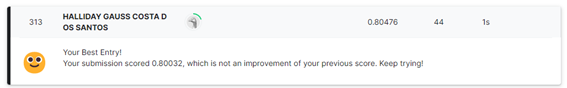